In [224]:
import numpy as np
import seaborn as sns
from random import random
import matplotlib.pyplot as plt

In [179]:
def explained_var(groups):
    '''
    Calculates explained variance part of ANOVA F-statistic
    
    parameters
    -------------
    groups - List of list containing sample groups
    
    returns explained variance
    '''
    flattened = [item for sublist in groups for item in sublist]
    Ybar = sum(flattened)/len(flattened)
    return sum([len(x)*(sum(x)/len(x)-Ybar)**2 for x in groups])/(len(groups)-1)

def unexplained_var(groups):
    '''
    Calculates unexplained variance part of ANOVA F-statistic
    
    parameters
    -------------
    groups - List of list containing sample groups
    
    returns unexplained variance
    '''
    return (
                sum([sum([(x-(sum(group)/len(group)))**2 for x in group]) for group in groups]) / 
                (len([item for sublist in groups for item in sublist]) - len(groups))
            )

def ANOVA(*groups):
    '''
    Calculates F-statistic
    
    parameters
    -------------
    groups - List of list or multiple list parameters containing sample groups
    
    returns the F-statistic
    '''
    if len(groups) <2:
        if len(groups) > 0 and len(groups[0]) > 1:
            groups = groups[0]
        else:
            print('Not valid F-test')
            return 0
    return explained_var(groups) / unexplained_var(groups)

In [327]:
## Create Distribution

d1 = 3 ## Equals num_groups -1
d2 = 36 ## Equals total_samples - num_groups
num_samples_f = 100000 ##The number of samples in our F-distribution. The higher the more accurate F-distribution


num_groups = d1 + 1
total_samples = d2 + num_groups
dist = []
for i in range(num_samples_f):
    ## Create num_groups groups sampled from the same (mean,var) normal distribution.
    ## Samples are uniformly distributed throughout groups so they do not have to have
    ## same number of samples. Constraint is each group must have at least 2 samples.
    groups = []
    mean = random()*10000
    var = random()*1000
    random_nums = (np.random.rand(total_samples-(2*num_groups)) * (num_groups)).astype(np.uint8)
    for j in range(num_groups):
        groups.append(list(np.random.normal(mean,var,2+len(random_nums[np.where(random_nums==j)]))))
    dist.append(ANOVA(groups))
f_distribution = np.array(dist)
f_distribution.sort(reverse = True) ## Sorted by value max->min so we can easily find alpha values

d1 = 3
d2 = 36


<Figure size 432x288 with 0 Axes>

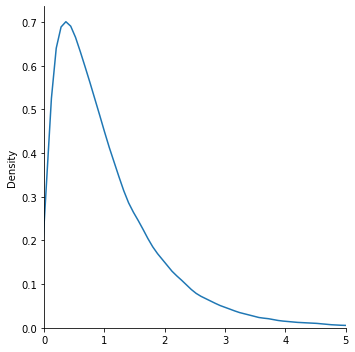

In [328]:
## Plot Distribution
plt.clf()
sns.displot(f_distribution,kind="kde")
plt.xlim(0,5)
plt.show()

In [330]:
print(f'alpha = 0.10 : {f_distribution[int(len(f_distribution)*.1)]}')
print(f'alpha = 0.05 : {f_distribution[int(len(f_distribution)*.05)]}')
print(f'alpha = 0.01 : {f_distribution[int(len(f_distribution)*.01)]}')

alpha = 0.10 : 2.228897095368902
alpha = 0.05 : 2.8529677299058083
alpha = 0.01 : 4.4094579252415675


In [324]:
len(f_distribution[np.where(f_distribution > 3.3)]) / len(f_distribution)
## Equivalent to right tail shown here: 
## https://blog.minitab.com/hubfs/Imported_Blog_Media/f_distribution_probability.png

0.03031

In [331]:
## Creating some helper functions to help us test our samples against distribution

def p_value(distribution,fstat):
    '''
    Find f-statistics p-value
    
    parameters
    -----------
    distribution - F-distribution created above
    fstat - F-statistic found from ANOVA() of sample, optional
    
    returns
    p-value
    '''
    return len(distribution[np.where(distribution>=fstat)])/len(distribution)

def find_significance(distribution,samples):
    '''
    Tests to see if our F-statistic is significant
    
    parameters
    -----------
    distribution - F-distribution created above
    sample - List of list which are groups of samples
    
    returns
    string of our F-statistics significance
    '''
    fstat = ANOVA(samples)
    return f'Our F-statistic is: {fstat}\nThe p-value for our F-statistic is {p_value(distribution,fstat)}'

In [355]:
## We can then test samples with our distribution like this

samples = [
    list((np.random.normal(0,1,11) * 40).astype(np.uint8)),
    list((np.random.normal(0,2,6) * 25).astype(np.uint8)),
    list((np.random.normal(0,1,10) * 38).astype(np.uint8)),
    list((np.random.normal(3,4,13) * 45).astype(np.uint8))
]

print(find_significance(f_distribution,samples))
print()

samples = [
    list((np.random.normal(0,1,11) * 45).astype(np.uint8)),
    list((np.random.normal(0,1,6) * 45).astype(np.uint8)),
    list((np.random.normal(0,1,10) * 45).astype(np.uint8)),
    list((np.random.normal(0,1,13) * 45).astype(np.uint8))
]

print(find_significance(f_distribution,samples))

Our F-statistic is: 1.631399951777817
The p-value for our F-statistic is 0.19733

Our F-statistic is: 0.23818523145325401
The p-value for our F-statistic is 0.86934
